In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
birthes = pd.read_html("https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C", thousands='.', decimal=',')[10]
birthes.replace("—", np.nan, inplace=True)
birthes[["2014", "2019"]] = birthes[["2014", "2019"]].apply(pd.to_numeric)
birthes = birthes[:-1]
birthes.fillna({
    "1950": birthes["1950"].mean(), 
    "1960": birthes["1960"].mean(),
    "1970": birthes["1970"].mean(),
    "2014": birthes["2014"].mean(),
    "2019": birthes["2019"].mean(),
}, inplace=True)

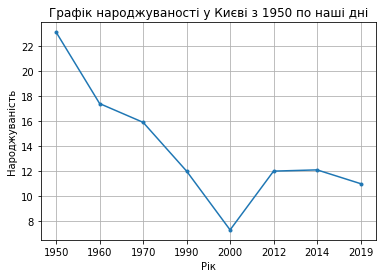

In [4]:
kyiv = birthes[birthes['Регіон'] == 'Київ']
plt.grid()
plt.xlabel("Рік")
plt.ylabel("Народжуваність")
plt.title("Графік народжуваності у Києві з 1950 по наші дні")
plt.plot(kyiv.columns[1:], kyiv.iloc[0].values[1:], marker='.')
plt.show()

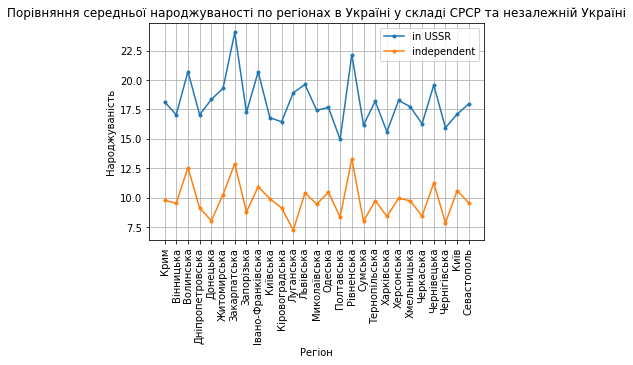

In [5]:
mean_birthes_ussr = birthes[["1950", "1960", "1970", "1990"]].mean(axis=1)
mean_birthes_indp = birthes[["2000", "2012" ,"2014", "2019"]].mean(axis=1)
regions = birthes.loc[:, "Регіон"].values
plt.xlabel("Регіон")
plt.ylabel("Народжуваність")
plt.title("Порівняння середньої народжуваності по регіонах в Україні у складі СРСР та незалежній Україні")
plt.grid()
plt.plot(regions, mean_birthes_ussr, label="in USSR", marker='.')
plt.plot(regions, mean_birthes_indp, label="independent", marker='.')
plt.xticks(rotation=90)
plt.legend()
plt.show()

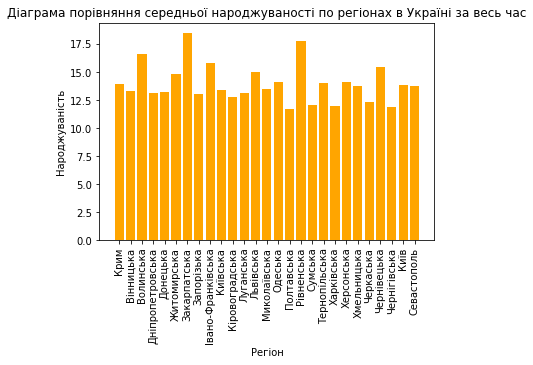

In [6]:
mean_birthes = birthes[["1950", "1960", "1970", "1990", "2000", "2012" ,"2014", "2019"]].mean(axis=1)
regions = birthes.loc[:, "Регіон"].values
plt.xlabel("Регіон")
plt.ylabel("Народжуваність")
plt.title("Діаграма порівняння середньої народжуваності по регіонах в Україні за весь час")
plt.xticks(rotation=90)
plt.bar(regions, mean_birthes, color='orange')
plt.show()